<a href="https://colab.research.google.com/github/HoarfrostRaven/Apprentissages-Automatiques-Appliques/blob/main/Cours2_Input.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Tabular Data

In [ ]:
data = pd.read_csv("data.csv",sep=";")

In [ ]:
data

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [ ]:
data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

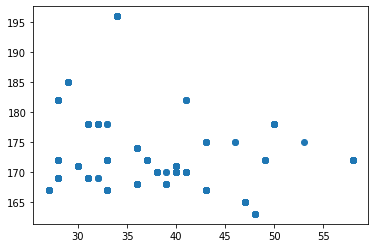

In [ ]:
plt.scatter(data["Age"],data["Height"])

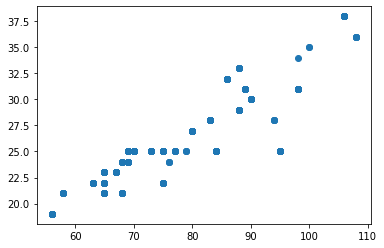

In [ ]:
plt.scatter(data["Weight"],data["Body mass index"])

# Image Input

In [ ]:
from PIL import Image
import requests

In [ ]:
# Read Image
im = Image.open(requests.get("https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png", stream=True).raw)

In [ ]:
arr_im = np.array(im)

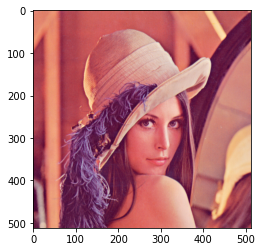

In [ ]:
plt.imshow(arr_im)

In [ ]:
arr_im.shape

(512, 512, 3)

In [ ]:
arr_im[:,:,0]

array([[226, 226, 223, ..., 230, 221, 200],
       [226, 226, 223, ..., 230, 221, 200],
       [226, 226, 223, ..., 230, 221, 200],
       ...,
       [ 84,  84,  92, ..., 173, 172, 177],
       [ 82,  82,  96, ..., 179, 181, 185],
       [ 82,  82,  96, ..., 179, 181, 185]], dtype=uint8)

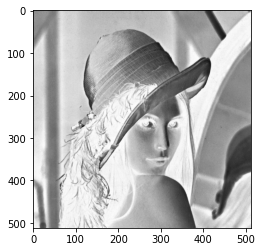

In [ ]:
plt.imshow(arr_im[:,:,1],cmap='Greys')
plt.show()

In [ ]:
flt = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
#flt = flt/(np.abs(flt).sum().sum()-1)

In [ ]:
def conv(matrix, filt):
    result = np.zeros((matrix.shape[0]-2,matrix.shape[1]-2))
    for i in range(1,result.shape[0]-1):
        for j in range(1,result.shape[1]-1):
            zoom = matrix[i-1:i+2,j-1:j+2]
            result[i-1,j-1] = np.multiply(zoom, flt).sum(axis=0).mean()
    return np.clip(result.astype(np.int32),0,255)

def convRGB(m, filt):
    result = np.zeros((m.shape[0]-2,m.shape[1]-2,3))
    result[:,:,0] = conv(m[:,:,0],filt)
    result[:,:,1] = conv(m[:,:,1],filt)
    result[:,:,2] = conv(m[:,:,2],filt)
    return np.clip(result,0,255)

In [ ]:
transfRGB = convRGB(arr_im, flt)

In [ ]:
transf = conv(arr_im[:,:,1],flt)

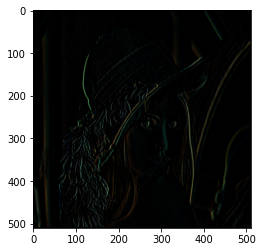

In [ ]:
plt.imshow(transfRGB.astype(np.int32))

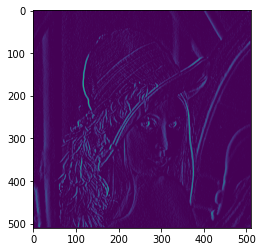

In [ ]:
plt.imshow(transf.astype(np.int32))

# Audio Input


In [ ]:
!pip install ipywebrtc notebook gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from ipywebrtc import AudioRecorder, CameraStream
import librosa
import librosa.display
from IPython.display import Audio
from google.colab import output
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
output.enable_custom_widget_manager()

In [ ]:
camera = CameraStream(constraints={'audio': True,'video':False})
recorder = AudioRecorder(stream=camera)
recorder

AudioRecorder(audio=Audio(value=b'', format='webm'), stream=CameraStream(constraints={'audio': True, 'video': …

In [ ]:
file = "test.webm"

with open(file, 'wb') as f:
    f.write(recorder.audio.value)
!ffmpeg -i test.webm -ac 1 -f wav file.wav -y -hide_banner -loglevel panic

In [ ]:
import IPython.display as ipd
ipd.Audio("file.wav")

In [ ]:
x , sr = librosa.load("file.wav")

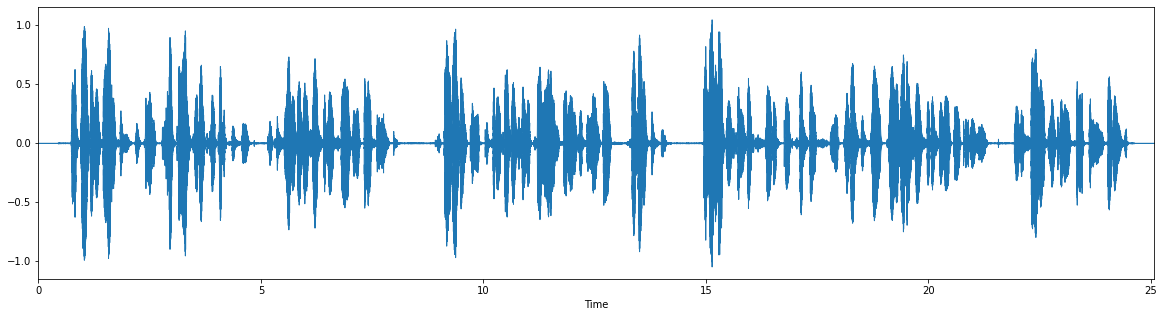

In [ ]:
plt.figure(figsize=(20, 5))
librosa.display.waveplot(x, sr=sr)

In [ ]:
print(f"Duration : {len(x)/sr} s")

Duration : 25.080272108843538 s


In [ ]:
# short time fourier transform
# (n_fft and hop length determine frequency/time resolution)
n_fft = 2048
S = librosa.stft(x, n_fft=n_fft, hop_length=n_fft//2)
print(S.shape)
# convert to db
D = librosa.amplitude_to_db(np.abs(S), ref=np.max)
np.max(abs(D))

(1025, 541)


80.0

In [ ]:
threshold_DB = 50
speechSections = librosa.effects.split(x, threshold_DB)
timeline = [u /sr for u in speechSections.reshape(-1)]

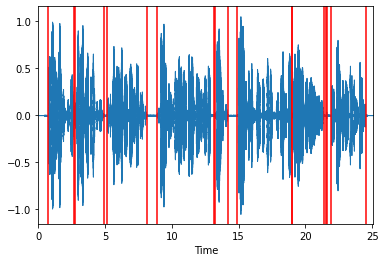

In [ ]:
librosa.display.waveplot(x, sr=sr)
for t in timeline:
  plt.axvline(x=t, color="red")


In [ ]:

def spectral_statistics(y,fs):
    """
    Compute mean frequency

    :param y: 1-d signal
    :param fs: sampling frequency [Hz]
    :return: mean frequency
    """
    spec = np.abs(np.fft.rfft(y))
    freq = np.fft.rfftfreq(len(y), d=1/fs)
    amp = spec / spec.sum()
    mean = (freq * amp).sum()
    return mean

In [ ]:
freq = [spectral_statistics(x[speechSections[i,0]:speechSections[i+1,1]],sr) for i in range(len(speechSections)-1) ]

In [ ]:
freq


[1304.3132030295574,
 1316.1863145249276,
 1211.38986233268,
 1209.1530624618479,
 1210.5849738169568,
 1203.9565836969607,
 1227.5139766557515,
 1226.6353454502973]

In [ ]:
sr

22050

# Words

In [ ]:
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 KB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.3-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp39-cp39-linux_x86_64.whl size=4391822 sha256=a0df19a6228327c9aad877496ac98dfcdbef8e9b5e9eadd7639b0dfb1b31acca
  Stored in directory: /root/.cache/pip/wheels/64/57/bc/1741406019061d5664914b070bd3e71f6244648732bc96109e
Successfully built fasttext


In [ ]:
import fasttext

In [ ]:
import fasttext.util
fasttext.util.download_model('fr', if_exists='ignore')  # French
ft = fasttext.load_model('cc.fr.300.bin')

In [ ]:
ft = fasttext.load_model('cc.fr.300.bin')

In [ ]:
ft

In [ ]:
from fasttext.util import reduce_model

In [ ]:
ft.get_dimension()
reduce_model(ft, 100)
ft.get_dimension()


In [ ]:
ft.get_word_vector('bonjour')

In [ ]:
ft.get_word_vector('salut')

array([-5.98516166e-02,  4.70869690e-02,  8.20071436e-03, -2.34842300e-03,
       -1.08392142e-01,  4.48409729e-02, -5.51160686e-02, -7.79620335e-02,
        4.39801700e-02, -2.49117669e-02,  6.17428944e-02, -2.44424436e-02,
       -4.48856838e-02,  3.48648056e-02,  7.27876872e-02,  5.27733564e-03,
        3.14643830e-02,  2.71646306e-03,  3.14171463e-02,  7.63840675e-02,
        2.40563564e-02,  9.58289765e-03, -4.95583005e-02, -1.97725138e-03,
       -1.86323561e-02, -7.66023844e-02, -2.12060548e-02, -9.07378942e-02,
       -7.77317733e-02, -6.28022626e-02, -5.38901128e-02,  1.00336447e-02,
        8.03732499e-02, -2.18576696e-02, -8.82410351e-03, -7.97353908e-02,
       -4.82044891e-02,  9.01347399e-03, -2.13895179e-02, -4.43976745e-02,
        2.66699679e-03, -5.14473133e-02, -7.11653475e-03,  4.13931012e-02,
       -1.58110693e-01, -3.39778177e-02,  1.49619933e-02, -6.95807114e-02,
        1.45654753e-01,  5.96723221e-02,  1.09627564e-02, -8.04022327e-03,
        4.43372242e-02,  

# Genetic Algorithm

In [ ]:
def test_func(c):
  return c[:,0]**2+c[:,1]**2

In [ ]:
candidates = np.array([[1,3],[2,1],[3,2]])

test_func(candidates)

array([10,  5, 13])

# ROC Curve

In [ ]:
from sklearn.metrics import RocCurveDisplay

y_real = [0,0,0,0,0,0,1,1]
y_proba = [0.4,0.5,0.3,0.3,0.4,0.1,0.4,0.7]
y_null = [0,0,0,0,0,0,0,0]

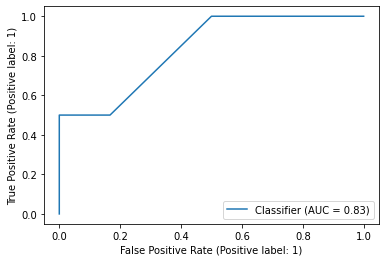

In [ ]:
RocCurveDisplay.from_predictions(y_real, y_proba)

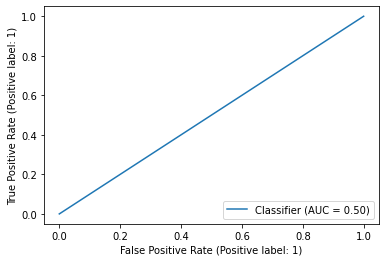

In [ ]:
RocCurveDisplay.from_predictions(y_real, y_null)